<a href="https://colab.research.google.com/github/nefeligk/Mura-Dataset/blob/main/MobileNet_(19_06_2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Mura Dataset

In [ ]:
import tensorflow as tf

tf.keras.utils.get_file("mura.zip", "https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip", extract=True, archive_format='zip')

3380256768/3380245855 [==============================] - 80s 0us/step


'/root/.keras/datasets/mura.zip'

In [ ]:
!unzip /root/.keras/datasets/mura.zip

Streaming output truncated to the last 5000 lines.
   creating: MURA-v1.1/train/XR_SHOULDER/patient01061/
   creating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/image1.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/image3.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/image2.png  
   creating: MURA-v1.1/train/XR_SHOULDER/patient01016/
   creating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/image1.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/image3.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/image2.png  
   creating: MURA-v1.1/train/XR_SHOULDER/patient01182/
   creating: MURA-v1.1/train/XR_SHOULDER/patient01182/study1_positive/
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01182/study1_positive/ima

#Dataset Statistics

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures

import os
from glob import glob

In [ ]:
#csv files path in drive
path = '/content/MURA-v1.1'

In [ ]:
train_image_paths_csv = "train_image_paths.csv"

train_images_paths = pd.read_csv(os.path.join(path,train_image_paths_csv),dtype=str,header=None)
train_images_paths.columns = ['image_path']

train_images_paths['label'] = train_images_paths['image_path'].map(lambda x:'positive' if 'positive' in x else 'negative')
train_images_paths['category']  = train_images_paths['image_path'].apply(lambda x: x.split('/')[2])  
train_images_paths['patientId']  = train_images_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient',''))

In [ ]:
valid_image_paths_csv = "valid_image_paths.csv"
valid_data_paths = pd.read_csv(os.path.join(path,valid_image_paths_csv),dtype=str,header=None)
valid_data_paths.columns = ['image_path']

valid_data_paths['label'] = valid_data_paths['image_path'].map(lambda x:'positive' if 'positive' in x else 'negative')
valid_data_paths['category']  = valid_data_paths['image_path'].apply(lambda x: x.split('/')[2]) 
valid_data_paths['patientId']  = valid_data_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient',''))

In [ ]:
total_number_of_training_images = np.shape(train_images_paths)[0]
print("total number of images:",total_number_of_training_images )
print ("\n\nnumber of null values", train_images_paths.isnull().sum())
print("\n\nnumber of training images:",np.shape(train_images_paths['image_path'])[0])


categories_counts = pd.DataFrame(train_images_paths['category'].value_counts())
print ('\n\ncategories:\n',categories_counts )
print('\n\nnumber of patients:',train_images_paths['patientId'].nunique())
print('\n\nnumber of labels:',train_images_paths['label'].nunique())
print ('\n\npositive casses:',len(train_images_paths[train_images_paths['label']=='positive']))
print ('\n\nnegative casses:',len(train_images_paths[train_images_paths['label']=='negative']))

total number of images: 36808


number of null values image_path    0
label         0
category      0
patientId     0
dtype: int64


number of training images: 36808


categories:
              category
XR_WRIST         9752
XR_SHOULDER      8379
XR_HAND          5543
XR_FINGER        5106
XR_ELBOW         4931
XR_FOREARM       1825
XR_HUMERUS       1272


number of patients: 11184


number of labels: 2


positive casses: 14873


negative casses: 21935


In [ ]:
print("data_shape:",np.shape(valid_data_paths))
print ("\n\nnumber of null values", valid_data_paths.isnull().sum())
print("\n\nnumber of training images:",np.shape(valid_data_paths['image_path']))

validaton_categories_counts = pd.DataFrame(valid_data_paths['category'].value_counts())
print ('\n\ncategories:\n',validaton_categories_counts)
print('\n\nnumber of patients:',valid_data_paths['patientId'].nunique())
print('\n\nnumber of labels:',valid_data_paths['label'].nunique())
print ('\n\npositive casses:',len(valid_data_paths[valid_data_paths['label']=='positive']))
print ('\n\nnegative casses:',len(valid_data_paths[valid_data_paths['label']=='negative']))

data_shape: (3197, 4)


number of null values image_path    0
label         0
category      0
patientId     0
dtype: int64


number of training images: (3197,)


categories:
              category
XR_WRIST          659
XR_SHOULDER       563
XR_ELBOW          465
XR_FINGER         461
XR_HAND           460
XR_FOREARM        301
XR_HUMERUS        288


number of patients: 783


number of labels: 2


positive casses: 1530


negative casses: 1667


# Data Preprocess

In [ ]:
# για μεγεθος εικονας και ποιο part of body
s = 256
part = "XR_HUMERUS"

In [ ]:
j_train = 0
for i in range(36808):
  if (train_images_paths['category'][i] == part):
    j_train +=1
print (j_train)  

j_dev = 0
for i in range(3197):
  if (valid_data_paths['category'][i] == part):
    j_dev +=1
print (j_dev)  

1272
288


In [ ]:
x_train = np.ones((j_train, s, s, 3))
x_dev = np.ones((j_dev, s, s, 3))

In [ ]:
y_train = np.ones((j_train, 1))
y_dev = np.ones((j_dev, 1))

In [ ]:
from PIL import Image
newsize = (s, s)
j=0
for i in range(36808):
    if (train_images_paths['category'][i] == part):
      image = Image.open('/content/'+train_images_paths['image_path'][i])
      image = image.resize(newsize)
      image = np.array(image)
      if(image.shape==(s, s, 3)):
          image =image[:s, :s,:1]
          image = image.reshape((s, s, 1))
      image = image.reshape((s, s, 1))
      x_train[j] = np.concatenate((image,image,image), axis=2)

          #create binary labels
      if(train_images_paths['label'][i]) == 'positive':
          y_train[j] = y_train[j]*1
      else:
          y_train[j] = y_train[j]*0
      j += 1  

In [ ]:
from PIL import Image
newsize = (s, s)
j = 0
for i in range(3197):
    if valid_data_paths['category'][i] == part:
      image = Image.open('/content/'+valid_data_paths['image_path'][i])
      image = image.resize(newsize)
      image = np.array(image)/255
      if(image.shape==(s, s, 3)):
          image =image[:s, :s,:1]
          image = image.reshape((s, s, 1))

      image = image.reshape((s, s, 1))
      
      x_dev[j] = np.concatenate((image,image,image), axis=2)
      
          #create binary labels
      if(valid_data_paths['label'][i]) == 'positive':
          y_dev[j] = y_dev[j]*1
      else:
          y_dev[j] = y_dev[j]*0
      j+=1

##Split data set

In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=12547392)

print('Train samples: {}'.format(len(x_train)))
print('Val samples: {}'.format(len(x_valid)))

Train samples: 1144
Val samples: 128


#Tuning με train-valid split




##Tune with val_loss

In [ ]:
import gc
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.callbacks import EarlyStopping # Callback for early stopping
from tensorflow.keras.layers import Input, Dense, Dropout # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.8.2


In [ ]:
def clean_up(model):
    K.clear_session()
    del model
    gc.collect()

In [ ]:
import gc
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.callbacks import EarlyStopping # Callback for early stopping
from tensorflow.keras.layers import Input, Dense, Dropout # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.8.2


In [ ]:
#!pip install -q -U keras-tuner

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.callbacks import EarlyStopping # Callback for early stopping
from tensorflow.keras.layers import Input, Conv2D, Add, Dense, Dropout, Flatten, MaxPool2D # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

N_CLASSES = 1

with tf.device('/device:GPU:0'):

  def build_model(hp):


    earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=15,
    verbose=2,
    mode="min",
    baseline=None,
    restore_best_weights=True,
    )

    input = Input(
        shape=input_shape,
        name='Input'
    )

    x = input




    base_model = MobileNet(
      input_shape=input_shape,
      alpha=1.0,
      depth_multiplier=1,
      dropout=0.001,
      include_top=False,
      weights="imagenet",
      input_tensor=None,
      pooling='max'
    )
    x = base_model.output



    # Tune the mlp layers 
    #dropout_rate = hp.Float(f"drop_rate", min_value=0.0, max_value=0.6, step=0.1)
    for i in range(hp.Int(f"mlp_layers",1,5)):
        x = Dense(
            units=hp.Choice(f"units_{i+1}", (64,128,256,512,1024)),
            kernel_initializer='glorot_uniform',
            activation=hp.Choice(f"activation", ["relu", "tanh"]),
            name='Hidden-{0:d}'.format(i + 1)
        )(x)
        x = Dropout(rate=hp.Float("hid_dropout", min_value=0.0, max_value=0.5, step=0.1))(x)
        
    
    
    # Define the output layer.
    output = Dense(
        units=1,
        activation='sigmoid',
        name='Output'
    )(x)


    lr_upper = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
  

    upper_layers_optimizer = Adam(lr_upper)
  

    model = Model(inputs=base_model.input, outputs=output)  

    for layer in base_model.layers:
        layer.trainable = False 

    model.compile(optimizer=upper_layers_optimizer, loss='binary_crossentropy', metrics=['binary_crossentropy','accuracy'])
    
    print('Finished tuning upper layers.')
    print('------------------') 

   

    # Now train the whole network with a low learning rate
   # for layer in base_model.layers:
    #    layer.trainable = True
    
   # model.compile(optimizer=full_network_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
 

    model.summary() # Print a description of the model.
    return model
   

In [ ]:
if not os.path.exists('./tuning'):
    os.makedirs('./tuning')

import keras_tuner as kt

input_shape = (s, s, 3)

tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=20,
    executions_per_trial=2,
    overwrite=True,
    directory='tuning/hyperparameters_mob',
    project_name="hyperparameters_mob",
)


earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=15,
    verbose=2,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)


tuner.search(x_train, y_train, batch_size = 128, epochs=50, validation_data=(x_valid, y_valid), callbacks=[earlyStopping])


# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=x_valid.shape)
best_model.summary()
tuner.search_space_summary()
tuner.results_summary()

Trial 20 Complete [00h 02m 03s]
val_loss: 0.5226502120494843

Best val_loss So Far: 0.521091878414154
Total elapsed time: 00h 50m 19s
INFO:tensorflow:Oracle triggered exit
Finished tuning upper layers.
------------------
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 128, 128, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 1

# Data augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8,1.0],
    zoom_range=[0.9,1.0],
    horizontal_flip=True)

#Train and Tune Full Network 


##Train upper layers


We train the upper layers based on the hyperparameters found during tuning, to tune the full network learning rate

In [ ]:
!pip install -U tensorflow-addons
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.2 MB/s 


In [ ]:
from tensorflow.keras.layers import BatchNormalization
input_shape = (s, s, 3)
def train_model(
        upper_layers_optimizer,
        full_network_optimizer,
        upper_layers_epochs=30,
        full_network_epochs=30,
        batch_size=128,
        mlp_hidden_layers=[1024, 1024, 512],
        mlp_hidden_activation='relu',
        mlp_dropout=0.2,
        output_activation='sigmoid',
        callbacks=None,
        verbose=0):
    
    np.random.seed(1402) # Define the seed for numpy to have reproducible experiments.
    set_seed(1981) # Define the seed for Tensorflow to have reproducible experiments.


    base_model = MobileNet(
      input_shape=input_shape,
      alpha=1.0,
      depth_multiplier=1,
      dropout=0.001,
      include_top=False,
      weights="imagenet",
      input_tensor=None,
      pooling='max'
  )

    x = base_model.output


    # Define MLP layers.
    for i, units in enumerate(mlp_hidden_layers):
        x = Dense(
            units=units,
            kernel_initializer='glorot_uniform',
            activation=mlp_hidden_activation,
            name='Hidden-{0:d}'.format(i + 1)
        )(x)
        if mlp_dropout > 0:
            x = Dropout(rate=mlp_dropout)(x)
   
    
    # Define the output layer.
    output = Dense(
        units=1,
        activation=output_activation,
        name='Output'
    )(x)

    # Define the model and train it.
    model = Model(inputs=base_model.input, outputs=output)

    # First train the upper layers for a few epochs
    for layer in base_model.layers:
        layer.trainable = False

    earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=15,
    verbose=2,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)

    model.compile(optimizer=upper_layers_optimizer, loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy', tfa.metrics.CohenKappa(num_classes=2, sparse_labels=False,name= 'cohen_kappa')])
    hs_upper_layers = model.fit(
        x_train_tuning,y_train,
        validation_data=(x_valid,y_valid),
        epochs=upper_layers_epochs,
        verbose=verbose,
        callbacks=[earlyStopping],
        batch_size=batch_size
    )
    print('Finished training upper layers.')
    print('------------------')
    
    hs_full_network = hs_upper_layers
    
    model.summary() # Print a description of the model.
    return model, hs_upper_layers, hs_full_network


In [ ]:
def clean_up(model):
    K.clear_session()
    del model
    gc.collect()

In [ ]:
batch_size=128

#Trial summary
#Hyperparameters:
#mlp_layers: 4
#units_1: 128
#activation: relu
#hid_dropout: 0.1
#lr: 0.005008172383779984
#units_2: 64
#units_3: 64
#units_4: 64
#Score: 0.521091878414154

mlp_hidden_layers = [128,64,64,64]
lr= 0.005008172383779984
mlp_hidden_activation = 'relu'
mlp_dropout = 0.1
upper_layers_epochs=100
full_network_epochs=100

# Using Adam
upper_layers_optimizer = Adam(lr)
full_network_optimizer = Adam(1e-6)

earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=2,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)


# 3 Convolutional Layers and Logistic Regression
mobilenet_mura_model, mobilenet_upper_hs, mobilenet_full_network_hs = train_model(
    upper_layers_optimizer=upper_layers_optimizer,
    full_network_optimizer=full_network_optimizer,
    batch_size=batch_size,
    upper_layers_epochs=upper_layers_epochs,
    full_network_epochs=full_network_epochs,
    mlp_hidden_layers=mlp_hidden_layers,
    mlp_hidden_activation=mlp_hidden_activation,
    mlp_dropout=mlp_dropout,
    output_activation='sigmoid',
    callbacks=[earlyStopping],
    verbose=1
)

# Evaluate on test data and show all the results.
mobilenet_mura_eval = mobilenet_mura_model.evaluate(x_dev, y_dev, verbose=1)
#clean_up(model=mobilenet_mura_model)

Epoch 1/100
9/9 [==============================] - 5s 324ms/step - loss: 2.2419 - accuracy: 0.4991 - binary_crossentropy: 2.2419 - cohen_kappa: -3.9685e-04 - val_loss: 1.0103 - val_accuracy: 0.5234 - val_binary_crossentropy: 1.0103 - val_cohen_kappa: 0.0000e+00
Epoch 2/100
9/9 [==============================] - 2s 223ms/step - loss: 0.9731 - accuracy: 0.5044 - binary_crossentropy: 0.9731 - cohen_kappa: -0.0020 - val_loss: 0.7029 - val_accuracy: 0.4766 - val_binary_crossentropy: 0.7029 - val_cohen_kappa: -0.0028
Epoch 3/100
9/9 [==============================] - 2s 219ms/step - loss: 0.7379 - accuracy: 0.5367 - binary_crossentropy: 0.7379 - cohen_kappa: 0.0623 - val_loss: 0.7034 - val_accuracy: 0.5234 - val_binary_crossentropy: 0.7034 - val_cohen_kappa: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 2s 226ms/step - loss: 0.7048 - accuracy: 0.5411 - binary_crossentropy: 0.7048 - cohen_kappa: 0.0763 - val_loss: 0.6784 - val_accuracy: 0.5625 - val_binary_crossentropy: 0.6784

##Tune full network

In [ ]:
!pip install -q -U keras-tuner

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.callbacks import EarlyStopping # Callback for early stopping
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, Add, Dense, Dropout, Flatten, MaxPool2D, BatchNormalization # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

  
def unfreeze_model(hp):

    earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=2,
    mode="min",
    baseline=None,
    restore_best_weights=True,
    )
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in mobilenet_mura_model.layers:
        if not isinstance(layer, BatchNormalization):
            layer.trainable = True

    lr_full_network = hp.Float("lr", min_value=1e-8, max_value=1e-5, sampling="log")
  
    full_network_optimizer = Adam(lr_full_network)

    mobilenet_mura_model.compile(
        optimizer=full_network_optimizer, loss="binary_crossentropy", metrics=['binary_crossentropy','accuracy']
    )
    return mobilenet_mura_model

     |████████████████████████████████| 133 kB 5.2 MB/s 


In [ ]:
if not os.path.exists('./tuning'):
    os.makedirs('./tuning')

import keras_tuner as kt

input_shape = (s, s, 3)

tuner = kt.RandomSearch(
    hypermodel=unfreeze_model,
    objective="val_loss",
    max_trials=20,
    executions_per_trial=2,
    overwrite=True,
    directory='tuning/hyperparameters_mob',
    project_name="hyperparameters_mob",
)


earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=15,
    verbose=2,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)


tuner.search(x_train_tuning, y_train, batch_size = 128, epochs=100, validation_data=(x_valid, y_valid), callbacks=[earlyStopping])

# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=x_valid.shape)
best_model.summary()
tuner.search_space_summary()
tuner.results_summary()

Trial 14 Complete [00h 01m 24s]
val_loss: 0.5544849634170532

Best val_loss So Far: 0.5230721235275269
Total elapsed time: 00h 23m 43s

Search: Running Trial #15

Value             |Best Value So Far |Hyperparameter
1.0649e-06        |9.1125e-06        |lr



##Train full network with low learning rate 

In [ ]:
!pip install -U tensorflow-addons
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.layers import BatchNormalization

input_shape = (s, s, 3)
def train_model(
        upper_layers_optimizer,
        full_network_optimizer,
        upper_layers_epochs=100,
        full_network_epochs=100,
        batch_size=128,
        mlp_hidden_layers=[128,64,64,64],
        mlp_hidden_activation='relu',
        mlp_dropout=0.1,
        output_activation='sigmoid',
        callbacks=None,
        verbose=0):
    
    np.random.seed(1402) # Define the seed for numpy to have reproducible experiments.
    set_seed(1981) # Define the seed for Tensorflow to have reproducible experiments.


    base_model = MobileNet(
      input_shape=input_shape,
      alpha=1.0,
      depth_multiplier=1,
      dropout=0.001,
      include_top=False,
      weights="imagenet",
      input_tensor=None,
      pooling='max'
  )

    x = base_model.output


    # Define MLP layers.
    for i, units in enumerate(mlp_hidden_layers):
        x = Dense(
            units=units,
            kernel_initializer='glorot_uniform',
            activation=mlp_hidden_activation,
            name='Hidden-{0:d}'.format(i + 1)
        )(x)
        if mlp_dropout > 0:
            x = Dropout(rate=mlp_dropout)(x)
   
    
    # Define the output layer.
    output = Dense(
        units=1,
        activation=output_activation,
        name='Output'
    )(x)

    # Define the model and train it.
    model = Model(inputs=base_model.input, outputs=output)

    # First train the upper layers for a few epochs
    for layer in base_model.layers:
        layer.trainable = False

    earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=2,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)

    model.compile(optimizer=upper_layers_optimizer, loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy', tfa.metrics.CohenKappa(num_classes=2, sparse_labels=False,name= 'cohen_kappa')])
    hs_upper_layers = model.fit(
        train_datagenerator.flow(x_train,y_train,
                        batch_size=128,
                        shuffle=True, seed=24),
        validation_data=(x_valid,y_valid),
        epochs=upper_layers_epochs,
        verbose=verbose,
        callbacks=[earlyStopping],
        batch_size=batch_size
    )
    print('Finished training upper layers.')
    print('------------------')
    
    # Now train the whole network with a low learning rate
    for layer in base_model.layers:
      layer.trainable = True

    for layer in base_model.layers:
      if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False
    
    model.compile(optimizer=full_network_optimizer, loss='binary_crossentropy', metrics=['accuracy','binary_crossentropy', tfa.metrics.CohenKappa(num_classes=2, sparse_labels=False,name= 'cohen_kappa')])
    
    
    hs_full_network = model.fit(
        train_datagenerator.flow(x_train,y_train,
                        batch_size=128,
                        shuffle=True,seed=24),
        validation_data=(x_valid,y_valid),
        epochs=full_network_epochs,
        verbose=verbose,
        callbacks=[earlyStopping],
        batch_size=batch_size
    )
    print('Finished training full network.')
    print('------------------')

    
    model.summary() # Print a description of the model.
    return model, hs_upper_layers, hs_full_network


In [ ]:
batch_size=128

#Trial summary
#Hyperparameters:
#mlp_layers: 4
#units_1: 128
#activation: relu
#hid_dropout: 0.1
#lr: 0.005008172383779984
#units_2: 64
#units_3: 64
#units_4: 64
#Score: 0.521091878414154

mlp_hidden_layers = [128,64,64,64]
lr= 0.005008172383779984
#lr_full=7.6654e-08
lr_full=9.1125e-06
mlp_hidden_activation = 'relu'
mlp_dropout = 0.1
upper_layers_epochs=100
full_network_epochs=100

# Using Adam
upper_layers_optimizer = Adam(lr)
full_network_optimizer = Adam(lr_full)

earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=2,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)


# 3 Convolutional Layers and Logistic Regression
mobilenet_mura_model, mobilenet_upper_hs, mobilenet_full_network_hs = train_model(
    upper_layers_optimizer=upper_layers_optimizer,
    full_network_optimizer=full_network_optimizer,
    batch_size=batch_size,
    upper_layers_epochs=upper_layers_epochs,
    full_network_epochs=full_network_epochs,
    mlp_hidden_layers=mlp_hidden_layers,
    mlp_hidden_activation=mlp_hidden_activation,
    mlp_dropout=mlp_dropout,
    output_activation='sigmoid',
    callbacks=[earlyStopping],
    verbose=1
)

# Evaluate on test data and show all the results.
mobilenet_mura_eval = mobilenet_mura_model.evaluate(x_dev, y_dev, verbose=1)
#clean_up(model=mobilenet_mura_model)

17235968/17225924 [==============================] - 0s 0us/step
Epoch 1/100
9/9 [==============================] - 21s 2s/step - loss: 2.3968 - accuracy: 0.4642 - binary_crossentropy: 2.3968 - cohen_kappa: -0.0731 - val_loss: 1.1131 - val_accuracy: 0.4766 - val_binary_crossentropy: 1.1131 - val_cohen_kappa: 0.0000e+00
Epoch 2/100
9/9 [==============================] - 18s 2s/step - loss: 0.9706 - accuracy: 0.4930 - binary_crossentropy: 0.9706 - cohen_kappa: -0.0281 - val_loss: 0.6866 - val_accuracy: 0.5234 - val_binary_crossentropy: 0.6866 - val_cohen_kappa: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 17s 2s/step - loss: 0.7665 - accuracy: 0.5280 - binary_crossentropy: 0.7665 - cohen_kappa: 0.0583 - val_loss: 0.6909 - val_accuracy: 0.5000 - val_binary_crossentropy: 0.6909 - val_cohen_kappa: -0.0452
Epoch 4/100
9/9 [==============================] - 17s 2s/step - loss: 0.7288 - accuracy: 0.5087 - binary_crossentropy: 0.7288 - cohen_kappa: 0.0086 - val_loss: 0.7086 - v

In [ ]:
def plot_history(hs, epochs, metric):
    print()
    plt.style.use('dark_background')
    plt.rcParams['figure.figsize'] = [15, 8]
    plt.rcParams['font.size'] = 16
    plt.clf()
    for label in hs:
        plt.plot(hs[label].history[metric], label='{0:s} train {1:s}'.format(label, metric), linewidth=2)
        plt.plot(hs[label].history['val_{0:s}'.format(metric)], label='{0:s} validation {1:s}'.format(label, metric), linewidth=2)
    x_ticks = np.arange(0, epochs + 1, epochs / 10)
    x_ticks [0] += 1
    plt.xticks(x_ticks)
    plt.ylim((0, 5))
    plt.xlabel('Epochs')
    plt.ylabel('Loss' if metric=='loss' else 'Accuracy')
    plt.legend()
    plt.show()

Upper Layers Evaluation:
 
Train Loss     : 0.45066
Validation Loss: 0.54652
---
Train Accuracy     : 0.78671
Validation Accuracy: 0.76562
---
Train Cohen Kappa: 0.56931
Validation Cohen Kappa: 0.52463
---
---
Full Network Evaluation:
 
Train Loss     : 0.18763
Validation Loss: 0.52434
---
Train Accuracy     : 0.93969
Validation Accuracy: 0.80469
---
Train Cohen Kappa: 0.87903
Validation Cohen Kappa: 0.60707

---
Test Loss      : 0.40056
Test Accuracy      : 0.84028



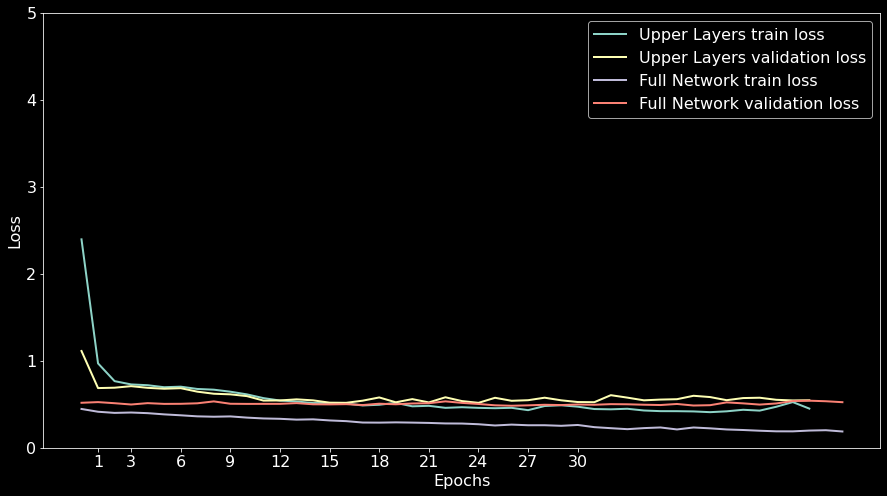

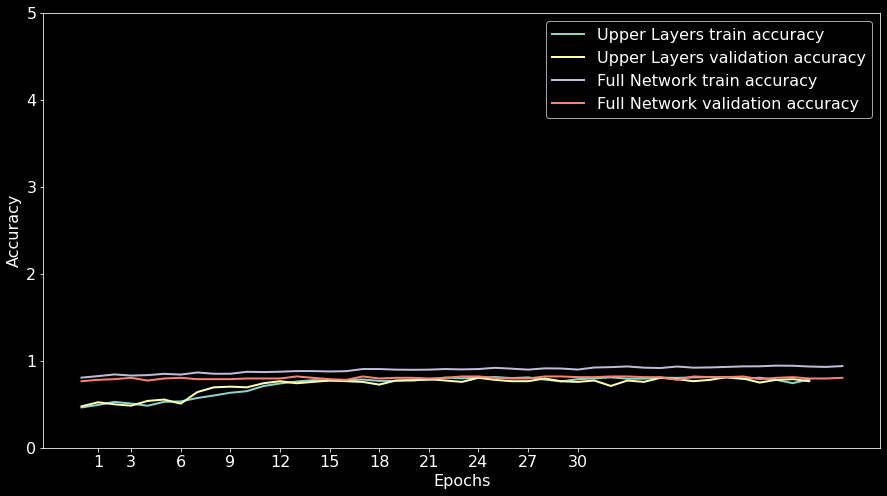

In [ ]:
print("Upper Layers Evaluation:")
print(" ")
print("Train Loss     : {0:.5f}".format(mobilenet_upper_hs.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(mobilenet_upper_hs.history['val_loss'][-1]))
print("---")
print("Train Accuracy     : {0:.5f}".format(mobilenet_upper_hs.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(mobilenet_upper_hs.history['val_accuracy'][-1]))
print("---")
print("Train Cohen Kappa: {0:.5f}".format(mobilenet_upper_hs.history['cohen_kappa'][-1]))
print("Validation Cohen Kappa: {0:.5f}".format(mobilenet_upper_hs.history['val_cohen_kappa'][-1]))
print("---")
print("---")
print("Full Network Evaluation:")
print(" ")
print("Train Loss     : {0:.5f}".format(mobilenet_full_network_hs.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(mobilenet_full_network_hs.history['val_loss'][-1]))
print("---")
print("Train Accuracy     : {0:.5f}".format(mobilenet_full_network_hs.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(mobilenet_full_network_hs.history['val_accuracy'][-1]))
print("---")
print("Train Cohen Kappa: {0:.5f}".format(mobilenet_full_network_hs.history['cohen_kappa'][-1]))
print("Validation Cohen Kappa: {0:.5f}".format(mobilenet_full_network_hs.history['val_cohen_kappa'][-1]))

print()
print('---')
print("Test Loss      : {0:.5f}".format(mobilenet_mura_eval[0]))
print("Test Accuracy      : {0:.5f}".format(mobilenet_mura_eval[1]))


# Plot train and validation error per epoch.
plot_history(
    hs={
        'Upper Layers': mobilenet_upper_hs,
        'Full Network': mobilenet_full_network_hs
    },
    epochs=30,
    metric='loss'
)
plot_history(
    hs={
        'Upper Layers': mobilenet_upper_hs,
        'Full Network': mobilenet_full_network_hs
    },
    epochs=30,
    metric='accuracy'
)

# Save Final Model 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
if not os.path.exists('./content/gdrive/My Drive/mobilenet'):
    os.makedirs('./content/gdrive/My Drive/mobilenet')


model = mobilenet_mura_model
model.save("/content/gdrive/My Drive/mobilenet/mob_model")


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/mobilenet/mob_model/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/mobilenet/mob_model/assets


# Load Model

In [ ]:
!pip install -U tensorflow-addons
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gc
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.callbacks import EarlyStopping # Callback for early stopping
from tensorflow.keras.layers import Input, Dense, Dropout # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.8.2


In [ ]:
from keras import models

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
new_model = models.load_model(filepath='/content/gdrive/My Drive/mobilenet/mob_model')

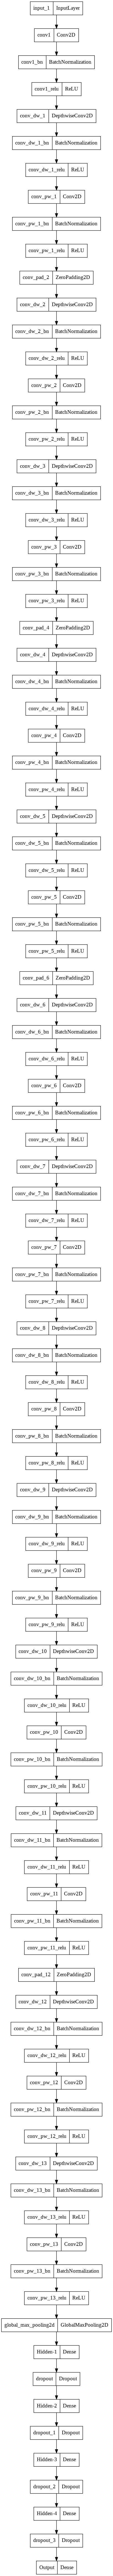

In [ ]:
%matplotlib notebook

from tensorflow.keras.utils import plot_model
plot_model(new_model, to_file='loaded_model.png')

from IPython.display import Image 
Image('loaded_model.png')

# Evaluate in other categories

##preprocess for each part

In [ ]:
# για μεγεθος εικονας και ποιο part of body
s = 256
part = "XR_WRIST"

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures

import os
from glob import glob

In [ ]:
#csv files path in drive
path = '/content/MURA-v1.1'

In [ ]:
valid_image_paths_csv = "valid_image_paths.csv"
valid_data_paths = pd.read_csv(os.path.join(path,valid_image_paths_csv),dtype=str,header=None)
valid_data_paths.columns = ['image_path']

valid_data_paths['label'] = valid_data_paths['image_path'].map(lambda x:'positive' if 'positive' in x else 'negative')
valid_data_paths['category']  = valid_data_paths['image_path'].apply(lambda x: x.split('/')[2]) 
valid_data_paths['patientId']  = valid_data_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient',''))

In [ ]:
import gc
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.callbacks import EarlyStopping # Callback for early stopping
from tensorflow.keras.layers import Input, Dense, Dropout # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.8.2


In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
j_dev = 0
for i in range(3197):
  if (valid_data_paths['category'][i] == part):
    j_dev +=1
print (j_dev)

659


In [ ]:
x_dev = np.ones((j_dev, s, s, 3))

In [ ]:
y_dev = np.ones((j_dev, 1))

In [ ]:
from PIL import Image
newsize = (s, s)
j = 0
for i in range(3197):
    if valid_data_paths['category'][i] == part:
      image = Image.open('/content/'+valid_data_paths['image_path'][i])
      image = image.resize(newsize)
      image = np.array(image)/255
      if(image.shape==(s, s, 3)):
          image =image[:s, :s,:1]
          image = image.reshape((s, s, 1))

      image = image.reshape((s, s, 1))
      
      x_dev[j] = np.concatenate((image,image,image), axis=2)
      
          #create binary labels
      if(valid_data_paths['label'][i]) == 'positive':
          y_dev[j] = y_dev[j]*1
      else:
          y_dev[j] = y_dev[j]*0
      j+=1

##humerus

In [ ]:
print ("for " + part+ ":")
hum = new_model.evaluate(x_dev,y_dev, verbose=2)
print (hum)

for XR_HUMERUS:
9/9 - 1s - loss: 0.4006 - accuracy: 0.8403 - binary_crossentropy: 0.4006 - cohen_kappa: 0.6812 - 1s/epoch - 150ms/step
[0.4005594253540039, 0.8402777910232544, 0.4005594253540039, 0.6811705827713013]


##forearm

In [ ]:
print ("for " + part+ ":")
forearm = new_model.evaluate(x_dev,y_dev, verbose=2)
print (forearm)

for XR_FOREARM:
10/10 - 1s - loss: 0.5746 - accuracy: 0.7010 - binary_crossentropy: 0.5746 - cohen_kappa: 0.4019 - 1s/epoch - 141ms/step
[0.5746325254440308, 0.7009966969490051, 0.5746325254440308, 0.4019075036048889]


##elbow

In [ ]:
print ("for " + part+ ":")
elb = new_model.evaluate(x_dev,y_dev, verbose=2)
print (elb)

for XR_ELBOW:
15/15 - 1s - loss: 0.6523 - accuracy: 0.6409 - binary_crossentropy: 0.6523 - cohen_kappa: 0.2812 - 805ms/epoch - 54ms/step
[0.6522676944732666, 0.6408601999282837, 0.6522676944732666, 0.28120511770248413]


##shoulder

In [ ]:
print ("for " + part+ ":")
shoulder = new_model.evaluate(x_dev,y_dev, verbose=2)
print (shoulder)

for XR_SHOULDER:
18/18 - 1s - loss: 0.7981 - accuracy: 0.5400 - binary_crossentropy: 0.7981 - cohen_kappa: 0.0859 - 1s/epoch - 56ms/step
[0.7981275320053101, 0.539964497089386, 0.7981274724006653, 0.0858842134475708]


##finger

In [ ]:
print ("for " + part+ ":")
fing = new_model.evaluate(x_dev,y_dev, verbose=2)
print (fing)

for XR_FINGER:
15/15 - 1s - loss: 0.8913 - accuracy: 0.5228 - binary_crossentropy: 0.8913 - cohen_kappa: -1.0461e-02 - 869ms/epoch - 58ms/step
[0.8913437724113464, 0.5227765440940857, 0.8913437724113464, -0.01046133041381836]


##wrist

In [ ]:
print ("for " + part+ ":")
wr = new_model.evaluate(x_dev,y_dev, verbose=2)
print (wr)

for XR_WRIST:
21/21 - 1s - loss: 0.9772 - accuracy: 0.5023 - binary_crossentropy: 0.9772 - cohen_kappa: 0.0841 - 1s/epoch - 55ms/step
[0.9771730303764343, 0.5022761821746826, 0.9771730303764343, 0.08414828777313232]


##hand

In [ ]:
print ("for " + part+ ":")
hand = new_model.evaluate(x_dev,y_dev, verbose=2)
print (hand)

for XR_HAND:
15/15 - 1s - loss: 1.1835 - accuracy: 0.4435 - binary_crossentropy: 1.1835 - cohen_kappa: 0.0305 - 871ms/epoch - 58ms/step
[1.183466911315918, 0.4434782564640045, 1.183466911315918, 0.03047865629196167]
